In [3]:
import numpy as np
df = np.genfromtxt('data.csv', delimiter=',')

Text(0.5, 1.0, 'Training Set')

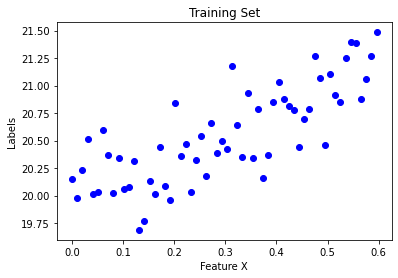

In [4]:
import matplotlib.pyplot as plt
plt.plot(df[:,0], df[:,1], 'bo')
plt.xlabel("Feature X")
plt.ylabel("Labels")
plt.title("Training Set")

In [9]:
x = np.zeros(df.shape)
x[:,0] = np.ones(df.shape[0])
x[:,1] = df[:,0]
y = df[:, 1]

In [16]:
def hypothesis(x_inp, theta):
    return x_inp @ theta

In [17]:
def cost_func(x_inp, y_tar, theta):
    m = x_inp.shape[0]
    return ((hypothesis(x_inp, theta) - y_tar).T @ (hypothesis(x_inp, theta) - y_tar)) / (2*m)

In [18]:
def gradient_descent(alpha, theta, x_inp, y_tar):
    m = x_inp.shape[0] #60
    prev_theta = np.copy(theta)
    np.subtract(theta, (alpha/m) * (x_inp.T @ (hypothesis(x_inp, theta) - y_tar)), out=theta)
    eps = 0.0000001
    itr = 1
    print(f'Epoch = 0, theta = {theta}, cost_func = {cost_func(x_inp, y_tar, theta)}')
    while np.max(np.absolute(theta - prev_theta)) > eps:
        prev_theta = np.copy(theta)
        np.subtract(theta, (alpha/m) * (x_inp.T @ (hypothesis(x_inp, theta) - y_tar)), out=theta)
        print(f'Epoch = {itr}, theta = {theta}, cost_func = {cost_func(x_inp, y_tar, theta)}')
        itr += 1
    return theta

In [ ]:
#Model selection
trial_alpha = np.array([0.01, 0.03, 0.09, 0.27])
calc_costs = np.zeros(4)
for i in range(0,60,15):
    cv_x = x[i:i+15, :]
    cv_y = y[i:i+15]
    train_x = np.concatenate((x[0:i,:], x[i+15:, :])) if i+15 < 60 else x[0:i,:]
    train_y = np.concatenate((y[0:i], y[i+15:])) if i+15 < 60 else y[0:i]
    theta = gradient_descent(trial_alpha[i//15], np.array([0.,0.]), train_x, train_y)
    calc_costs[i//15] = cost_func(cv_x, cv_y, theta)
print(f'cost_func for alpha(0.01, 0.03, 0.09, 0.27) = {calc_costs}')


In [ ]:
l_alpha = 0.03
test_df = np.genfromtxt('test_data.csv', delimiter=',')
test_x = np.zeros(test_df.shape)
test_x[:, 0] = np.ones(test_df.shape[0])
test_x[:, 1] = test_df[:, 0]
test_y = test_df[:,1]

theta = gradient_descent(l_alpha, np.array([0.,0.]), x, y)
print(f'Cost func on training set = {cost_func(x, y, theta)}')
print(f'Cost func on test set = {cost_func(test_x, test_y, theta)}')

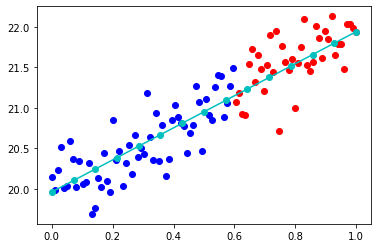

In [9]:
plt.clf()
plt.plot(df[:,0], df[:,1], 'bo')
plt.plot(test_df[:,0], test_df[:,1], 'ro')
points = np.linspace(0,1,15)
line = np.array([hypothesis([1,i],theta) for i in points])
plt.plot(points, line, 'co-')